## HW10-Q1

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

plt.rcParams['figure.figsize']=8,8

def generate_and_plot(kx,mu):
    distr=multivariate_normal(
        cov=kx,mean=mu,
        seed=1000
    )

    data=distr.rvs(size=5000)
    plt.grid()

    plt.plot(data[:,0],data[:,1],'o',color='lime',
                markeredgewidth=0.5,
                markeredgecolor='black')

    plt.title(r'Random samples from a 2D-Gaussain distribution')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis('equal')

def ellipsoid(x,mu,kx):
    return ((x-mu) @ np.linalg.inv(kx) @ (x-mu).T)<=1

def plot_ellipsoid(mu,kx,ax):
    #repeat generate 5000 points
    distr=multivariate_normal(
        cov=kx,mean=mu,
        seed=1000
    )
    data=distr.rvs(size=5000)

    #filter the points which are belong to the ellipsoid and plot
    filtered_data=np.array([point for point in data if ellipsoid(point,mu,kx)])

    plt.grid()
    plt.plot(filtered_data[:,0],filtered_data[:,1],'o',color='lime',
                markeredgewidth=0.5,
                markeredgecolor='black')
    plt.title(r'filtered data and ellipsoid')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis('equal')

    eigenvalues,eigenvectors=np.linalg.eigh(kx)
    axis_lengths=2*np.sqrt(eigenvalues)
    angle=np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    #print(angle)
    ell=Ellipse(xy=mu,width=axis_lengths[0],height=axis_lengths[1],angle=angle,
                edgecolor='red', facecolor='none', lw=2)
    ax.add_patch(ell)

    


### when mu = $ \begin{bmatrix} 0 & 0 \end{bmatrix} $   Kx = $ \begin{bmatrix} 2 & 0 \\ 0 & 4 \end{bmatrix} $

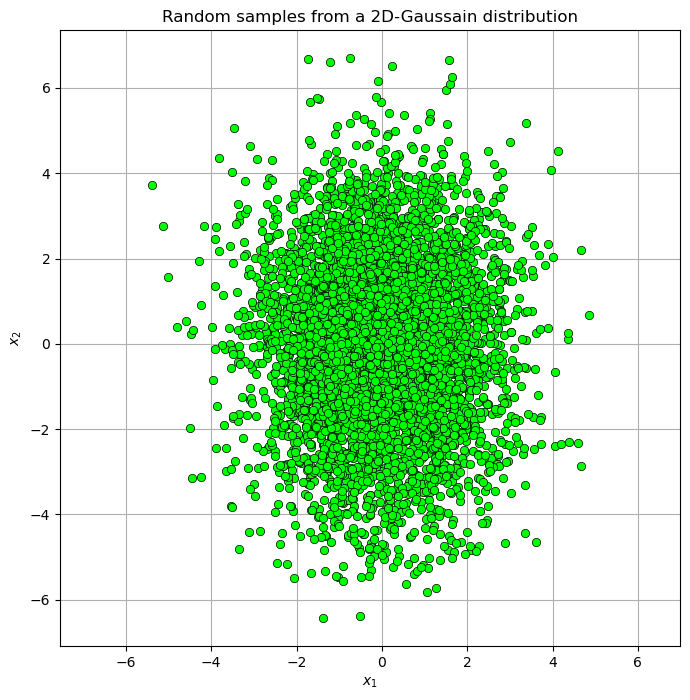

In [124]:
Kx=np.array([[2.0,0.0],[0.0,4.0]])
mu=np.array([0,0])
random_seed=10

generate_and_plot(Kx,mu)

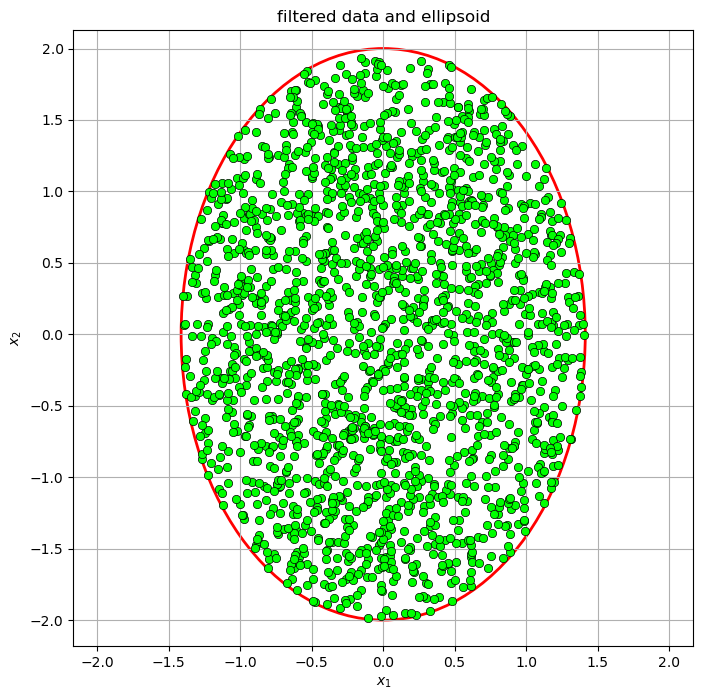

In [125]:
ax=plt.gca()
plot_ellipsoid(mu,Kx,ax)
plt.show()

#### Compare
- I observe that when I use the definition of an ellipsoid to filter the random points, they lie precisely within the ellipsoid we draw based on the eigenvalues and eigenvectors. 
- Additionally, the lengths of the principal axes are shorter than the range of the random points, approximately by a factor of one-third.

(The comparison results of the last two experiments are the same as this one.)

### when mu = $ \begin{bmatrix} 0 & 0 \end{bmatrix} $   Kx = $ \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} $

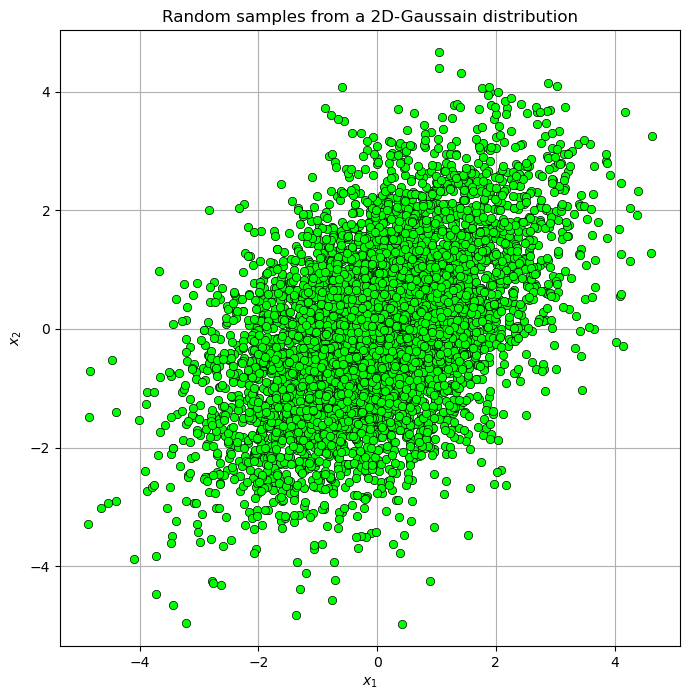

In [126]:
Kx=np.array([[2.0,1.0],[1.0,2.0]])
mu=np.array([0,0])
random_seed=10

generate_and_plot(Kx,mu)

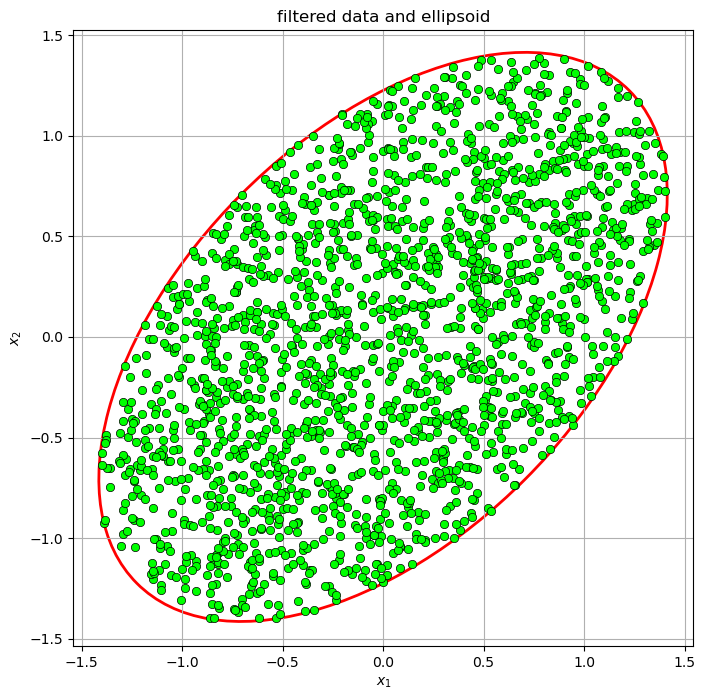

In [127]:
ax=plt.gca()
plot_ellipsoid(mu,Kx,ax)
plt.show()

### when mu = $ \begin{bmatrix} 2 & 1 \end{bmatrix} $   Kx = $ \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} $

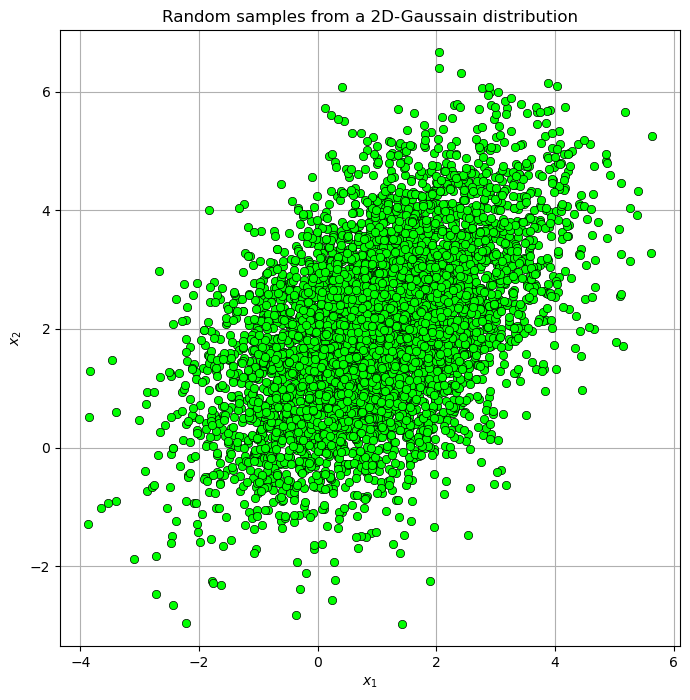

In [128]:
Kx=np.array([[2.0,1.0],[1.0,2.0]])
mu=np.array([1.0,2.0])
random_seed=10

generate_and_plot(Kx,mu)

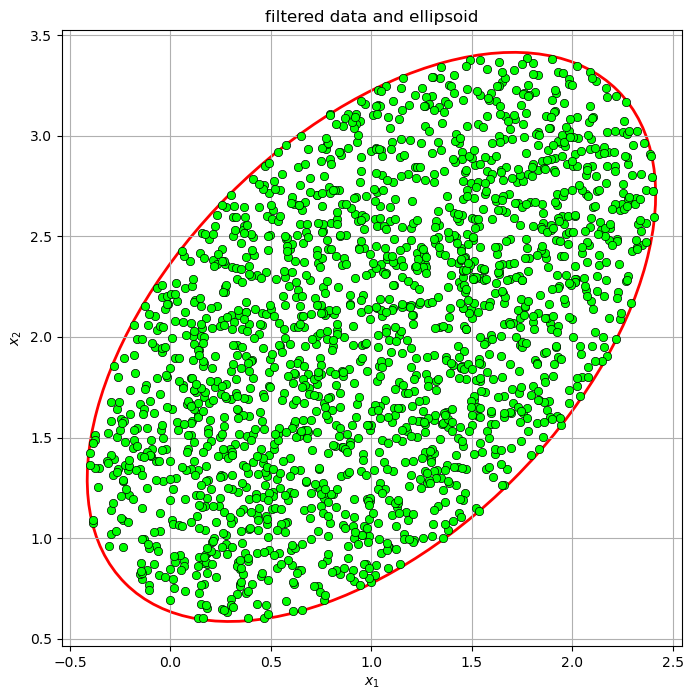

In [129]:
ax=plt.gca()
plot_ellipsoid(mu,Kx,ax)
plt.show()